In [16]:
%load_ext autoreload

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
arr = np.arange(0,20,1)
np.random.shuffle(arr)

In [11]:
list(arr)

[1, 8, 4, 13, 16, 9, 15, 6, 7, 3, 19, 18, 12, 5, 17, 10, 0, 2, 14, 11]

In [14]:
np.delete(arr, [0,1,2])

array([13, 16,  9, 15,  6,  7,  3, 19, 18, 12,  5, 17, 10,  0,  2, 14, 11])

In [50]:
%autoreload
from ulw_data.torch_dataset.splits import k_fold_challenge_splitter

In [51]:
k_fold_challenge_splitter(None, K='6-unequal', split=5)

[array([18,  0,  8]), array([15,  4, 10]), array([10,  0,  2, 14])]
--
--
[array([ 3, 11, 17, 14,  7,  6, 19,  2, 12, 16,  5, 10,  9,  1, 15, 13,  4]), array([ 0, 14,  7,  9,  8, 16,  6, 13,  5, 11,  2, 18, 17, 19,  3,  1, 12]), array([ 1,  8,  4, 13, 16,  9, 15,  6,  7,  3, 19, 18, 12,  5, 17, 11])]


In [23]:
random_sample_0 = np.array([3, 11, 17, 14, 7, 6, 19, 2, 12, 16, 5, 10, 9, 1, 15, 18, 0, 8, 13, 4])
random_sample_1 = np.array([0, 14, 7, 9, 8, 16, 6, 13, 5, 11, 2, 18, 17, 19, 3, 15, 4, 10, 1, 12])
random_sample_2 = np.array([1, 8, 4, 13, 16, 9, 15, 6, 7, 3, 19, 18, 12, 5, 17, 10, 0, 2, 14, 11])

dataset_indices = [random_sample_0, random_sample_1,random_sample_2]

In [26]:
dataset_indices[0][[1,2,3]]

array([11, 17, 14])

In [68]:
%autoreload
from ulw_data.torch_dataset.challenge_data_pipeline import train_data_pipeline

In [72]:
train_ds, val_ds = train_data_pipeline(
    ds_path="/media/benp/NVMEspare/datasets/full_WMH_Chal_dataset/preprocessed/collated/",
    val_proportion=None,
    seed=5,
    transforms=None,
    dims=2,
    remove_mask_channel=False,
    put_mask_in_label=False,
    cv_fold=1,
    cv_splits='5',
)


[array([ 7,  6, 19,  2]), array([ 8, 16,  6, 13]), array([16,  9, 15,  6])]
--
--
[array([ 3, 11, 17, 14, 12, 16,  5, 10,  9,  1, 15, 18,  0,  8, 13,  4]), array([ 0, 14,  7,  9,  5, 11,  2, 18, 17, 19,  3, 15,  4, 10,  1, 12]), array([ 1,  8,  4, 13,  7,  3, 19, 18, 12,  5, 17, 10,  0,  2, 14, 11])]


In [73]:
len(train_ds), len(val_ds)

(2044, 501)

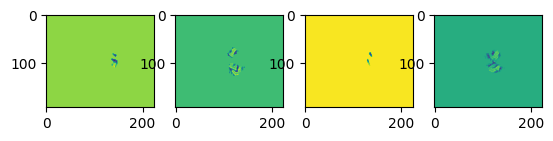

In [71]:
plt.subplot(1,4,1)
plt.imshow(train_ds[0]['image'][0])
plt.subplot(1,4,2)
plt.imshow(train_ds[-1]['image'][0])
plt.subplot(1,4,3)
plt.imshow(val_ds[0]['image'][0])
plt.subplot(1,4,4)
plt.imshow(val_ds[-1]['image'][0])